In [1]:
# train_flip = train[['year_remod/add', 'mo_sold', 'yr_sold', 'saleprice']]

# train_flip_june = train_flip[(train_flip['mo_sold']==6)].sort_values(['yr_sold'])
# train_flip_june

# train_newer_remo = train_flip[(train_flip['year_remod/add']>=2006)].sort_values(by = 'mo_sold')
# train_newer_remo.sort_values(by = 'yr_sold')

# plt.figure(figsize=(12,12))
# plt.scatter(train_flip['saleprice'],train_flip['year_remod/add']);
# Will have to come back to and look at when I can get more data

In [2]:
#Use as intro for slide presentation.
#ask a home buyer to describe their dream house,
# and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad.
# But this playground competition's dataset proves that much more 
# influences price negotiations than the number of bedrooms or a white-picket fence.

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
train = pd.read_csv('datasets/train.csv')

train.columns = map(str.lower, train.columns)

train.columns = train.columns.str.replace(' ', '_', regex = True)

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

pd.set_option('max_colwidth', 40)
# https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe
# https://pandas.pydata.org/pandas-docs/version/0.22/options.html
test = pd.read_csv('datasets/test.csv')
test.columns = map(str.lower, test.columns)
test.columns = test.columns.str.replace(' ', '_', regex = True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
id                 878 non-null int64
pid                878 non-null int64
ms_subclass        878 non-null int64
ms_zoning          878 non-null object
lot_frontage       718 non-null float64
lot_area           878 non-null int64
street             878 non-null object
alley              58 non-null object
lot_shape          878 non-null object
land_contour       878 non-null object
utilities          878 non-null object
lot_config         878 non-null object
land_slope         878 non-null object
neighborhood       878 non-null object
condition_1        878 non-null object
condition_2        878 non-null object
bldg_type          878 non-null object
house_style        878 non-null object
overall_qual       878 non-null int64
overall_cond       878 non-null int64
year_built         878 non-null int64
year_remod/add     878 non-null int64
roof_style         878 non-null object
roof_m

In [7]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [8]:
train.loc[:, ['alley','misc_feature','mas_vnr_type']] = train.loc[:, ['alley','misc_feature','mas_vnr_type']].fillna('None')
train.loc[:, 'fence'] = train.loc[:, 'fence'].fillna('No_Fence')
train.loc[:, 'pool_qc'] = train.loc[:,'pool_qc'].fillna('No_Pool')
train.loc[:, ['garage_cond', 'garage_qual', 'garage_finish', 'garage_type']] = train.loc[:,['garage_cond', 'garage_qual', 'garage_finish', 'garage_type']].fillna('No_Garage')
train.loc[:,['garage_cars', 'garage_yr_blt', 'garage_area','bsmt_full_bath','bsmt_half_bath','lot_frontage','mas_vnr_area','total_bsmt_sf','bsmt_unf_sf','bsmtfin_sf_2','bsmtfin_sf_1']]=train.loc[:,['garage_cars', 'garage_yr_blt', 'garage_area','bsmt_full_bath','bsmt_half_bath','lot_frontage','mas_vnr_area','total_bsmt_sf','bsmt_unf_sf','bsmtfin_sf_2','bsmtfin_sf_1']].fillna(0.0)
train.loc[:, 'fireplace_qu'] = train.loc[:, 'fireplace_qu'].fillna('No_Fireplace')
train.loc[:,['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']] = train.loc[:,['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']].fillna('No_Basement')

In [9]:
test.loc[:, ['lot_frontage','mas_vnr_area', 'garage_yr_blt']]= test.loc[:,['lot_frontage', 'mas_vnr_area', 'garage_yr_blt']].fillna(0.0)
test.loc[:, ['alley', 'mas_vnr_type','misc_feature']]= test.loc[:,['alley', 'mas_vnr_type','misc_feature']].fillna('None')
test.loc[:, ['electrical']]= test.loc[:,['electrical']].fillna('SBrkr')
#Because other houses of similar build and location have this breaker unit, and the house is obviously getting power from somewhere
test.loc[:, 'pool_qc'] = test.loc[:,'pool_qc'].fillna('No_Pool')
test.loc[:, 'fence'] = test.loc[:, 'fence'].fillna('No_Fence')
test.loc[:, 'fireplace_qu'] = test.loc[:, 'fireplace_qu'].fillna('No_Fireplace')
test.loc[:, ['garage_cond', 'garage_qual', 'garage_finish','garage_type']] = test.loc[:,['garage_cond', 'garage_qual', 'garage_finish', 'garage_type']].fillna('No_Garage')
test.loc[:,['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']] = test.loc[:,['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']].fillna('No_Basement')

In [10]:
train.describe().T

count          mean           std          min          25%  \
id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
pid              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
ms_subclass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
lot_frontage     2051.0  5.794442e+01  3.313733e+01          0.0         43.5   
lot_area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
overall_qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
overall_cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
year_built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
year_remod/add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
mas_vnr_area     2051.0  9.862652e+01  1.743247e+02          0.0          0.0   
bsmtfin_sf_1     2051.0  4.420848e+02  4.611950e+02          0.0          0.0   
bsmtfin_sf_2     2051.0  4.793564e+01  1.649641e+02          0.0          0.0   
bsmt_unf_sf      2051.0  5.674515e+02  4.450228e+02          0.0        220.0   
total_bsmt_sf    2051.0  1.057472e+03  4.499080e+02          0.0        793.0   
1st_flr_sf       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd_flr_sf       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
low_qual_fin_sf  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
gr_liv_area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
bsmt_full_bath   2051.0  4.271087e-01  5.225887e-01          0.0          0.0   
bsmt_half_bath   2051.0  6.338372e-02  2.515902e-01          0.0          0.0   
full_bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
half_bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
bedroom_abvgr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
kitchen_abvgr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
totrms_abvgrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
garage_yr_blt    2051.0  1.868726e+03  4.541337e+02          0.0       1957.0   
garage_cars      2051.0  1.775719e+00  7.653569e-01          0.0          1.0   
garage_area      2051.0  4.734408e+02  2.161351e+02          0.0        319.0   
wood_deck_sf     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
open_porch_sf    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
enclosed_porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3ssn_porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
screen_porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
pool_area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
misc_val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
mo_sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
yr_sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
saleprice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%          75%          max  
id                    1486.0       2198.0       2930.0  
pid              535453200.0  907180080.0  924152030.0  
ms_subclass             50.0         70.0        190.0  
lot_frontage            63.0         78.0        313.0  
lot_area              9430.0      11513.5     159000.0  
overall_qual             6.0          7.0         10.0  
overall_cond             5.0          6.0          9.0  
year_built            1974.0       2001.0       2010.0  
year_remod/add        1993.0       2004.0       2010.0  
mas_vnr_area             0.0        159.0       1600.0  
bsmtfin_sf_1           368.0        733.5       5644.0  
bsmtfin_sf_2             0.0          0.0       1474.0  
bsmt_unf_sf            474.0        

In [11]:
train[(train['fence']!= 'No_Fence')&(train['pool_qc']!='No_Pool')] 

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
52    2351  527356020           60        RL          80.0     16692   Pave   
657   1567  914475020           80        RL          76.0      9880   Pave   
761   2499  532476050           80        RL         100.0     14330   Pave   
1130  2358  527377030           20        RL          78.0     10140   Pave   
1249  2736  905426150           80        RL           0.0     19690   Pave   
1635  1941  535353050           20        RL          75.0      9532   Pave   
1875  2279  923202220           20        RL         200.0     43500   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
52    None       IR1          Lvl    AllPub     Inside        Gtl   
657   None       Reg          Lvl    AllPub     Inside        Gtl   
761   None       IR1          Low    AllPub     Corner        Gtl   
1130  None       Reg          Lvl    AllPub     Inside        Gtl   
1249  None       IR1          Lvl    AllPub    CulDSac        Gtl   
1635  None       Reg          Lvl    AllPub     Inside        Gtl   
1875  None       Reg          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
52         NWAmes        RRAn        Norm      1Fam      2Story             7   
657       Mitchel        Norm        Norm      1Fam        SLvl             6   
761       Veenker        Norm        Norm      1Fam        SLvl             7   
1130       NWAmes        Norm        Norm      1Fam      1Story             6   
1249      Edwards        Norm        Norm      1Fam        SLvl             6   
1635        NAmes        Norm        Norm      1Fam      1Story             4   
1875      Mitchel      Artery        Norm      1Fam      1Story             3   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
52               5        1978            1978      Gable   CompShg   
657              6        1977            1977      Gable   CompShg   
761              4        1974            1974      Gable   CompShg   
1130             6        1974            1999        Hip   CompShg   
1249             7        1966            1966       Flat   Tar&Grv   
1635             6        1953            1953      Gable   CompShg   
1875             5        1953            1953      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
52        Plywood      Plywood      BrkFace         184.0         TA   
657       Plywood      Plywood         None           0.0         TA   
761       WdShing      Wd Sdng      BrkFace         145.0         Gd   
1130      HdBoard      HdBoard      BrkFace          99.0         TA   
1249      Plywood      Plywood         None           0.0         Gd   
1635      VinylSd      VinylSd         None           0.0         TA   
1875      MetalSd      MetalSd         None           0.0         TA   

     exter_cond foundation    bsmt_qual    bsmt_cond bsmt_exposure  \
52           TA     CBlock           Gd           TA            No   
657          TA     CBlock           TA           TA            Av   
761          Fa     CBlock           Gd           TA            Gd   
1130         TA     CBlock           TA           TA            No   
1249         Gd     CBlock           Gd           TA            Av   
1635         TA     CBlock           TA           TA            No   
1875         TA     CBlock  No_Basement  No_Basement   No_Basement   

     bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
52              BLQ         790.0            LwQ         469.0        133.0   
657             ALQ         522.0            Unf           0.0        574.0   
761             ALQ        1023.0            BLQ         497.0        228.0   
1130            ALQ         663.0            LwQ         377.0          0.0   
1249            Unf           0.0            Unf           0.0        6

In [12]:
train[(train['saleprice']> 400_000)&(train['garage_area']>1_000.0)] 

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
81     367  527214050           20        RL          63.0     17423   Pave   
332   1060  528118090           60        RL          96.0     12539   Pave   
526   2385  528114010           20        RL         120.0     14780   Pave   
800   1702  528118050           20        RL          59.0     17169   Pave   
1158  1426  906412010           20        RL          91.0     11778   Pave   
1796   434  528110090           60        RL         107.0     13891   Pave   
1964  1638  527216080           20        RL          52.0     51974   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
81    None       IR1          Lvl    AllPub    CulDSac        Gtl   
332   None       Reg          Lvl    AllPub     Inside        Gtl   
526   None       IR1          HLS    AllPub     Corner        Mod   
800   None       IR2          Lvl    AllPub    CulDSac        Gtl   
1158  None       Reg          Lvl    AllPub     Inside        Gtl   
1796  None       Reg          Lvl    AllPub     Inside        Gtl   
1964  None       IR1          Lvl    AllPub    CulDSac        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
81        StoneBr        Norm        Norm      1Fam      1Story             9   
332       NridgHt        PosN        Norm      1Fam      2Story            10   
526       NridgHt        Norm        Norm      1Fam      1Story             9   
800       NridgHt        Norm        Norm      1Fam      1Story            10   
1158      CollgCr        Norm        Norm      1Fam      1Story             9   
1796      NridgHt        Norm        Norm      1Fam      2Story             9   
1964      StoneBr        PosN        Norm      1Fam      1Story             9   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
81               5        2008            2009        Hip   CompShg   
332              5        2005            2006        Hip   CompShg   
526              5        2005            2005        Hip   CompShg   
800              5        2007            2007        Hip   CompShg   
1158             5        2008            2008        Hip   CompShg   
1796             5        2008            2009        Hip   CompShg   
1964             5        2006            2007        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
81        VinylSd      VinylSd        Stone         748.0         Ex   
332       CemntBd      CmentBd      BrkFace         468.0         Ex   
526       VinylSd      VinylSd      BrkFace         568.0         Ex   
800       CemntBd      CmentBd      BrkFace         970.0         Ex   
1158      VinylSd      VinylSd        Stone         554.0         Gd   
1796      VinylSd      VinylSd        Stone         424.0         Ex   
1964      VinylSd      VinylSd      BrkFace         710.0         Ex   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
81           TA      PConc        Ex        TA            No            GLQ   
332          TA      PConc        Ex        TA            Gd            GLQ   
526          TA      PConc        Ex        TA            Gd            GLQ   
800          TA      PConc        Ex        TA            Av            GLQ   
1158         TA      PConc        Gd        TA            Gd            GLQ   
1796         TA      PConc        Ex        TA            Gd            Unf   
1964         TA      PConc        Ex        TA            Av            GLQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
81          1904.0            Unf           0.0        312.0         2216.0   
332         1082.0            Unf           0.0        538.0         1620.0   
526         1505.0            Unf           0.0        363.0         1868.0   
800         1684.0            Unf           0.0        636.0         2320.0   

In [13]:
train[train['saleprice']>500_000]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
81     367  527214050           20        RL          63.0     17423   Pave   
138   2331  527210040           60        RL          60.0     18062   Pave   
151   2333  527212030           60        RL          85.0     16056   Pave   
623    457  528176030           20        RL         100.0     14836   Pave   
800   1702  528118050           20        RL          59.0     17169   Pave   
823     16  527216070           60        RL          47.0     53504   Pave   
1164   424  528106020           20        RL         105.0     15431   Pave   
1592  2335  527214060           60        RL          82.0     16052   Pave   
1671    45  528150070           20        RL         100.0     12919   Pave   
1692  2451  528360050           60        RL         114.0     17242   Pave   
1796   434  528110090           60        RL         107.0     13891   Pave   
1964  1638  527216080           20        RL          52.0     51974   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
81    None       IR1          Lvl    AllPub    CulDSac        Gtl   
138   None       IR1          HLS    AllPub    CulDSac        Gtl   
151   None       IR1          Lvl    AllPub     Inside        Gtl   
623   None       IR1          HLS    AllPub     Inside        Mod   
800   None       IR2          Lvl    AllPub    CulDSac        Gtl   
823   None       IR2          HLS    AllPub    CulDSac        Mod   
1164  None       Reg          Lvl    AllPub     Inside        Gtl   
1592  None       IR1          Lvl    AllPub    CulDSac        Gtl   
1671  None       IR1          Lvl    AllPub     Inside        Gtl   
1692  None       IR1          Lvl    AllPub     Inside        Gtl   
1796  None       Reg          Lvl    AllPub     Inside        Gtl   
1964  None       IR1          Lvl    AllPub    CulDSac        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
81        StoneBr        Norm        Norm      1Fam      1Story             9   
138       StoneBr        Norm        Norm      1Fam      2Story            10   
151       StoneBr        Norm        Norm      1Fam      2Story             9   
623       NridgHt        Norm        Norm      1Fam      1Story            10   
800       NridgHt        Norm        Norm      1Fam      1Story            10   
823       StoneBr        Norm        Norm      1Fam      2Story             8   
1164      NridgHt        Norm        Norm      1Fam      1Story            10   
1592      StoneBr        Norm        Norm      1Fam      2Story            10   
1671      NridgHt        Norm        Norm      1Fam      1Story             9   
1692      NoRidge        Norm        Norm      1Fam      2Story             9   
1796      NridgHt        Norm        Norm      1Fam      2Story             9   
1964      StoneBr        PosN        Norm      1Fam      1Story             9   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
81               5        2008            2009        Hip   CompShg   
138              5        2006            2006        Hip   CompShg   
151              5        2005            2006        Hip   CompShg   
623              5        2004            2005        Hip   CompShg   
800              5        2007            2007        Hip   CompShg   
823              5        2003            2003        Hip   CompShg   
1164             5        2008            2008        Hip   CompShg   
1592             5        2006            2006        Hip   CompShg   
1671             5        2009            2010        Hip   CompShg   
1692             5        1993            1994        Hip   CompShg   
1796             5        2008            2009        Hip   CompShg   
1964             5        2006            2007        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
81        VinylSd      VinylSd  

In [14]:
train[(train['sale_type']=='New')&(train['mo_sold']==6)].sort_values(by=['yr_sold'])
# look at used houses sold in 6,7 then look at when houses >400_000 where sold see if corr

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
6     2827  908186070          180        RM          35.0      3675   Pave   
779   2408  528186100           20        RL          61.0      7740   Pave   
1129  2463  528477030           20        FV          81.0     11216   Pave   
85    2409  528186110          120        RL          48.0      6373   Pave   
914   1688  528102120           20        RL          91.0     11825   Pave   
922   1789  528439050           20        RL          76.0      9158   Pave   
964   1807  531363020           20        RL          63.0      7500   Pave   
1811  1842  533208070          160        FV          35.0      4251   Pave   
1187  1786  528435060           20        RL          83.0      9849   Pave   
1298  1795  528456230           20        FV          75.0      9000   Pave   
1561  2100  906378150           20        RL          93.0     10481   Pave   
1636  1742  528228270          120        RL          53.0      3922   Pave   
1719  1703  528120010           60        RL         134.0     16659   Pave   
1964  1638  527216080           20        RL          52.0     51974   Pave   
682   1053  528104050           20        RL         114.0     14803   Pave   
281   1075  528186130          120        RL          89.0      8232   Pave   
963    568  533210020          160        FV          30.0      3000   Pave   
1612   945  911370500          120        RM          44.0      3843   Pave   
1741   100  533213030           20        FV           0.0      4403   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
6     None       Reg          Lvl    AllPub     Inside        Gtl   
779   None       Reg          Lvl    AllPub     Inside        Gtl   
1129  None       Reg          Lvl    AllPub     Inside        Gtl   
85    None       Reg          Lvl    AllPub     Inside        Gtl   
914   None       Reg          Lvl    AllPub     Inside        Gtl   
922   None       Reg          Lvl    AllPub     Inside        Gtl   
964   None       Reg          Lvl    AllPub     Inside        Gtl   
1811  Pave       IR1          Lvl    AllPub     Inside        Gtl   
1187  None       Reg          Lvl    AllPub     Inside        Gtl   
1298  None       Reg          Lvl    AllPub     Inside        Gtl   
1561  None       IR1          Lvl    AllPub     Inside        Gtl   
1636  None       Reg          Lvl    AllPub     Inside        Gtl   
1719  None       IR1          Lvl    AllPub     Corner        Gtl   
1964  None       IR1          Lvl    AllPub    CulDSac        Gtl   
682   None       Reg          Lvl    AllPub     Inside        Gtl   
281   None       IR1          Lvl    AllPub     Inside        Gtl   
963   Pave       Reg          Lvl    AllPub     Inside        Gtl   
1612  None       IR1          HLS    AllPub     Inside        Mod   
1741  None       IR2          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
6         Edwards        Norm        Norm    TwnhsE      SFoyer             6   
779       NridgHt        Norm        Norm    TwnhsE      1Story             9   
1129      Somerst        Norm        Norm      1Fam      1Story             8   
85        NridgHt        Norm        Norm    TwnhsE      1Story             9   
914       NridgHt        Norm        Norm      1Fam      1Story             8   
922       Somerst        Norm        Norm      1Fam      1Story             8   
964       SawyerW        Norm        Norm      1Fam      1Story             6   
1811      Somerst        Norm        Norm    TwnhsE      2Story             7   
1187      Somerst        Norm        Norm      1Fam      1Story             7   
1298      Somerst        Norm        Norm      1Fam      1Story             7   
1561      CollgCr        Norm        Norm      1Fam      1Story             8   
1636      Blmngtn        Norm        Norm    TwnhsE      1Story           

In [15]:
train[(train['saleprice']<500_000) & (train['sale_type']=='New')].sort_values(by=['yr_sold'])

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
6     2827  908186070          180        RM          35.0      3675   Pave   
1651  2415  528218140           60        RL          58.0     14054   Pave   
421   2475  531375100           20        RL          63.0     13072   Pave   
907   2757  906382050           60        RL          73.0      8760   Pave   
899   2464  528480070           60        FV          84.0     10728   Pave   
1630  2381  528106010           60        RL         111.0     16259   Pave   
479   2761  906394010           60        RL          91.0     10984   Pave   
1603  2461  528456200           20        FV          72.0      8640   Pave   
1601  2460  528445010           20        RL          85.0     10936   Pave   
540   2753  906380170           20        RL          64.0      7406   Pave   
1036  2884  911370430          120        RM          41.0      5748   Pave   
1560  2318  527108020           20        RL          50.0     14859   Pave   
895   2413  528218080           60        RL          65.0     10237   Pave   
1525  2429  528228575          120        RL          53.0      3982   Pave   
884   2391  528120140           60        RL          82.0      9942   Pave   
880   2455  528429060           60        RL          75.0     12447   Pave   
640   2420  528228280          120        RL          43.0      3087   Pave   
1480  2406  528181030          120        RL          48.0      6955   Pave   
1467  2416  528221010           20        RL         102.0     11660   Pave   
1424  2809  907410040           60        RL          74.0      8581   Pave   
721   2468  528488110           20        FV          60.0      7200   Pave   
726   2380  528102080           60        RL          72.0     16387   Pave   
846   2426  528228545          120        RL          43.0      3010   Pave   
779   2408  528186100           20        RL          61.0      7740   Pave   
392   2389  528118110           60        RL         120.0     13975   Pave   
1206  2470  528488130           20        FV          60.0      7200   Pave   
387   2384  528112010           20        RL         108.0     12228   Pave   
220   2814  907418020           60        RL          68.0      8846   Pave   
998   2903  921205050           20        RL          88.0     11577   Pave   
2025  2394  528142060           60        RL          82.0     10672   Pave   
189   2334  527212040           60        RL          82.0     12438   Pave   
190   2330  527210030           60        RL          59.0     16023   Pave   
195   2760  906392120           20        RL          78.0     11645   Pave   
1851  2816  907420090           20        RL          65.0      8767   Pave   
1129  2463  528477030           20        FV          81.0     11216   Pave   
1149  2811  907410110           20        RL          84.0     10084   Pave   
1821  2472  531367010           20        RL          91.0     11024   Pave   
1883  2412  528218060           60        RL          65.0     10237   Pave   
85    2409  528186110          120        RL          48.0      6373   Pave   
1815  2456  528429100           20        RL          49.0     15218   Pave   
254   2813  907414040           20        RL          65.0      8772   Pave   
272   2417  528221100           60        RL         105.0     15578   Pave   
1170  2337  527216050           60        RL          66.0     13682   Pave   
317   2332  527210050           60        RL          63.0     12292   Pave   
41    2383  528110050           20        RL         107.0     13891   Pave   
940   2398  528150080           20        RL         121.0     13758   Pave   
1739  2317  527108010           60        RL         134.0     19378   Pave   
22    2393  528142010           60        RL         103.0     12867   Pave   
1111  2815  907420070           60        RL          65.0      8461   Pave   
1186  2105  906380120           20        RL          68.0

In [16]:
train['yr_sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: yr_sold, dtype: int64

In [17]:
train[(train['full_bath']!=0)].sort_values('full_bath')

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
654   2787  907203040           20        RL          70.0      9800   Pave   
1637  2026  903425280           70        RL          60.0      8730   Pave   
1635  1941  535353050           20        RL          75.0      9532   Pave   
768   2236  910201110           50        RM          50.0      6060   Pave   
769   2912  923225510           20        RL          58.0     10172   Pave   
1634  1132  531363060           20        RL          63.0      7500   Pave   
1631  1827  532378240           20        RL           0.0      6173   Pave   
774   2534  534201250           60        RL          72.0      8640   Pave   
775   1273  535453210           20        RL          70.0      7931   Pave   
776    219  905102060          190        RL          75.0     11625   Pave   
777    133  534476260           80        RL          80.0      9600   Pave   
1628   182  902207130           30        RM          68.0      9656   Pave   
781   1671  527425025           20        RL           0.0     17199   Pave   
783   2621  535450180           50        RL          60.0     10800   Pave   
785   1976  902106070           50        RM          50.0      6000   Pave   
1622  1919  535151110           20        RL          60.0      8250   Pave   
790   1205  534276190           20        RL          74.0      7785   Pave   
1619  1947  535375130           50        RL          60.0     10134   Pave   
794   1255  535375140           20        RL          60.0     10122   Pave   
1616   854  907201220           20        RL           0.0     16269   Pave   
796   1676  527450030          160        RM          21.0      2205   Pave   
797   2599  535377070           30        RL          60.0     10914   Pave   
1615  1245  535180120           20        RL          75.0     10425   Pave   
1614  2861  909276070           50        RL          80.0     12400   Pave   
802   1432  907126030           20        RL          65.0      9750   Pave   
803    689  535476110           90        RL          75.0      8604   Pave   
1611   879  907290210          120        RM           0.0      4435   Pave   
806    893  908186080          180        RM          35.0      3675   Pave   
807    944  911104060           30   C (all)          60.0     10200   Pave   
810   2529  534129230           60        RL          80.0     10400   Pave   
1638  2245  911128020           30   C (all)          60.0      6060   Pave   
811   1448  907202160           80        RL           0.0     10970   Pave   
763   2769  907125020           85        RL          57.0      8846   Pave   
1642  1216  534426040           20        RL          72.0     10007   Pave   
1661  1330  903204095           40        RM          50.0      9100   Pave   
1660  1449  907202190           20        RL           0.0      9216   Pave   
722   1135  531375050           20        RL          63.0     13072   Pave   
723    719  902329080           70        RM          60.0      3600   Pave   
1659  1152  532354150           20        RL          75.0      8100   Pave   
725   2506  533208050          120        FV          37.0      3316   Pave   
1658   287  909100110           70        RL          66.0      6858   Pave   
1655   723  902402150           30        RM          60.0      7200   Pave   
730   1967  535457020           20        RL          80.0      8000   Pave   
1654   223  905105200           20        RL          65.0      7800   Pave   
732   1389  905200510           20        RL           0.0      8544   Pave   
733   2553  534430110           20        RL           0.0     11425   Pave   
1653  1238  535152200           20        RL          74.0      8856   Pave   
736    172  902106130           30        RM          56.0      4485   Pave   
737    788  905402070           20        RL           0.0     15635   Pave   
738   1979  902110010           30        RM          56.0

In [18]:
number = train.select_dtypes(exclude='object')
# Pre-mask pull only columns with floats and ints
number_corr = number[number.columns].corr()
#Implement premask to find the correlation between each value with sale price

In [19]:
corr_refined = number_corr['saleprice'].sort_values(ascending=False).to_frame().T
# https://www.geeksforgeeks.org/python-pandas-series-to_frame/


In [20]:
corr_refined

saleprice  overall_qual  gr_liv_area  garage_area  garage_cars  \
saleprice        1.0      0.800207     0.697038     0.649897     0.647781   

           total_bsmt_sf  1st_flr_sf  year_built  year_remod/add  full_bath  \
saleprice       0.629303    0.618486    0.571849         0.55037   0.537969   

           totrms_abvgrd  mas_vnr_area  fireplaces  bsmtfin_sf_1  \
saleprice       0.504014      0.503579    0.471093      0.423856   

           open_porch_sf  wood_deck_sf  lot_area  bsmt_full_bath  half_bath  \
saleprice       0.333476       0.32649  0.296566        0.283332   0.283001   

           garage_yr_blt  2nd_flr_sf  bsmt_unf_sf  lot_frontage  \
saleprice       0.258645    0.248452     0.190861      0.181456   

           bedroom_abvgr  screen_porch  3ssn_porch   mo_sold  pool_area  \
saleprice       0.137067      0.134581    0.048732  0.032735   0.023106   

           bsmtfin_sf_2  misc_val   yr_sold  low_qual_fin_sf  bsmt_half_bath  \
saleprice      0.016432 -0.007375 -0.015203        -0.041594        -0.04529   

                 id  ms_subclass  overall_cond  kitchen_abvgr  enclosed_porch  \
saleprice -0.051398    -0.087335     -0.097019      -0.125444       -0.135656   

                pid  
saleprice -0.255052

In [21]:
# poly = PolynomialFeatures(include_bias=False)
# X_poly_train = poly.fit_transform(corr_refined)
# X_poly_train = pd.DataFrame(X_poly_train, columns=poly.get_feature_names(corr_refined.columns))
# https://stackoverflow.com/questions/36728287/sklearn-preprocessing-polynomialfeatures-how-to-keep-column-names-headers-of
# Thank You Riley Dallas for teaching this to me
# test_num_corr = test[['overall_qual','gr_liv_area', 'garage_area', 'garage_cars', 
#                                   'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add']].corr()
# test_poly = PolynomialFeatures(include_bias = False)
# corr_test_poly = poly.fit_transform(test_num_corr)
# corr_test_poly = pd.DataFrame(corr_test_poly, columns=poly.get_feature_names(test_num_corr.columns))

In [22]:
# corr_test_poly.head()

In [23]:
# X_poly_train = X_poly_train[X_poly_train > .55].dropna(axis=1)

In [24]:
# X_poly_train

In [25]:
corr_refined = corr_refined[corr_refined > .4].dropna(axis=1)

In [26]:
corr_refined

saleprice  overall_qual  gr_liv_area  garage_area  garage_cars  \
saleprice        1.0      0.800207     0.697038     0.649897     0.647781   

           total_bsmt_sf  1st_flr_sf  year_built  year_remod/add  full_bath  \
saleprice       0.629303    0.618486    0.571849         0.55037   0.537969   

           totrms_abvgrd  mas_vnr_area  fireplaces  bsmtfin_sf_1  
saleprice       0.504014      0.503579    0.471093      0.423856

In [27]:
y = train['saleprice']
X = train[['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf',
                  '1st_flr_sf','year_built', 'year_remod/add', 'year_remod/add', 'full_bath',
                  'totrms_abvgrd', 'mas_vnr_area', 'fireplaces', 'bsmtfin_sf_1']]

In [28]:
X.shape

(2051, 14)

In [29]:
y.shape

(2051,)

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_hat = lm.predict(X)

In [33]:
lm.coef_

array([ 1.88512441e+04,  3.74677312e+01,  2.87061594e+01,  5.30943557e+03,
        8.77208985e+00,  1.33699674e+01,  1.91908551e+02,  1.99025984e+02,
        1.99025984e+02, -2.38048240e+03,  1.28857834e+03,  3.42073464e+01,
        8.43844899e+03,  1.69675893e+01])

In [34]:
lm.intercept_

-1226390.8450688187

In [35]:
resids = y - y_hat

In [36]:
np.mean(resids)

5.6760273928295866e-12

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 9.000e+00,
        1.292e+03, 7.110e+02, 2.800e+01, 8.000e+00]),
 array([-524820.26130628, -448935.91869532, -373051.57608437,
        -297167.23347341, -221282.89086245, -145398.5482515 ,
         -69514.20564054,    6370.13697042,   82254.47958137,
         158138.82219233,  234023.16480328]),
 <a list of 10 Patch objects>)

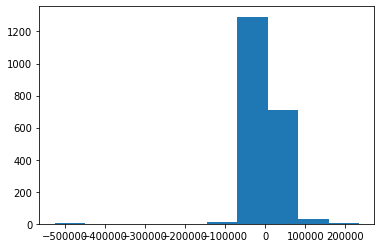

In [37]:
plt.hist(resids)

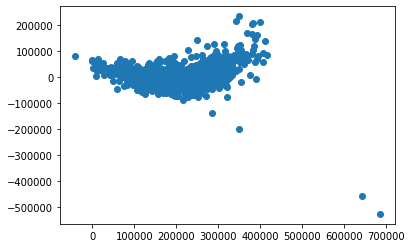

In [38]:
plt.scatter(y_hat,resids)

In [39]:
metrics.mean_absolute_error(y,y_hat)

22187.643286856164

In [40]:
metrics.mean_squared_error(y,y_hat)

1200885565.4940076

In [41]:
sse = sum((y-y_hat)**2)
sse

2463016294828.211

In [42]:
np.sqrt(metrics.mean_squared_error(y,y_hat))

34653.79583096212

In [57]:
metrics.r2_score(y,y_hat)

0.8087418370957802

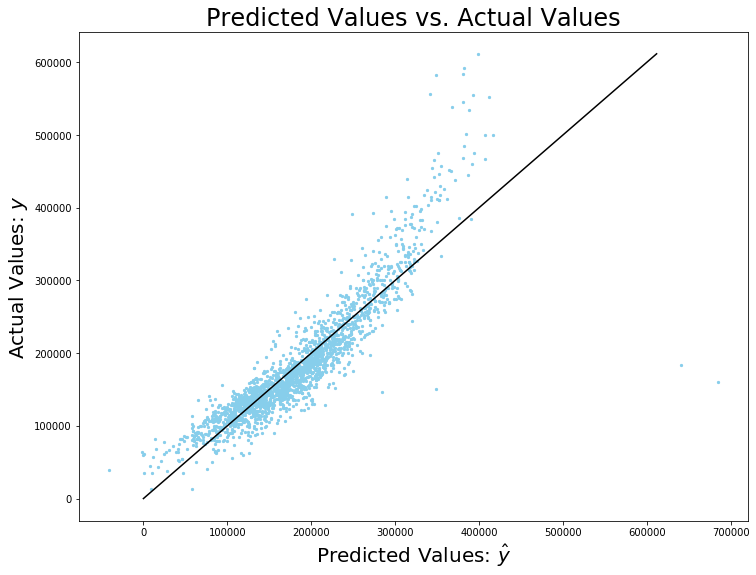

In [59]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_hat, y, s=5, color='skyblue')

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [44]:
lm.score(X,y)

0.8087418370957802

In [45]:
# sns.pairplot(train[['overall_qual','gr_liv_area','garage_area', 'garage_cars','total_bsmt_sf', '1st_flr_sf', 'year_built',
#           'year_remod/add', 'full_bath', 'totrms_abvgrd', 'mas_vnr_area', 'fireplaces', 'bsmtfin_sf_1','saleprice']])
# plt.savefig('Train_Pairplot_Corr')
# https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lm.score(X_train, y_train)

0.7930366475735428

In [48]:
lm.score(X_test, y_test)

0.8522717718225311

In [49]:
cross_val_score(lm, X_train, y_train)

array([0.82992578, 0.81372258, 0.82388277, 0.76823945, 0.58392595])

In [50]:
cross_val_score(lm, X_train, y_train).mean()

0.7639393048744816

In [51]:
null_pred = y_train.mean()
null_pred

181061.9934980494

In [52]:
cross_val_score(lm, X_test, y_test)

array([0.88167293, 0.88314746, 0.85826518, 0.81144184, 0.85996799])

In [53]:
cross_val_score(lm, X_test, y_test).mean()

0.8588990794055487

In [54]:
submit = test[['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf',
                  '1st_flr_sf','year_built', 'year_remod/add', 'year_remod/add', 'full_bath',
                  'totrms_abvgrd', 'mas_vnr_area', 'fireplaces', 'bsmtfin_sf_1']] 
test['saleprice'] = lm.predict(submit)
submission_6 = test[['id','saleprice']]
submission_6

id      saleprice
0    2658  149968.771095
1    2718  185632.096021
2    2414  208836.693173
3    1989  121968.593063
4     625  192891.656672
5     333   88542.382486
6    1327  103213.389998
7     858  131211.721587
8      95  190003.836010
9    1568  184400.727352
10   2482  163677.727121
11   1364  135660.245354
12   2584  154039.571746
13    818  291176.130530
14   2673  172799.677162
15   2089  143908.855438
16   1297  179273.586063
17    790  107875.971192
18   2616  215750.673770
19    720  207701.952903
20    222  136447.395337
21    557  123282.098174
22   1148  192606.707515
23   2766  167386.910679
24    534  194229.214933
25   1452  109645.610672
26    630  132773.165227
27   2648  128350.382455
28    125  156510.879950
29   1904   21199.090925
30   1670   93323.158783
31    756   89486.177810
32    717  248664.938592
33   1032  164973.167468
34    852  219386.070456
35   1731  188266.865357
36   2639  128012.704730
37   2071   78545.769115
38   1267  113660.962231
39   1851  193590.416521
40    567  159903.785910
41   2439  221738.093787
42   1898  159165.587416
43    647  164650.133141
44   2256  236718.699504
45    979  106730.999533
46   1444  225927.661801
47   2485  115539.718570
48    157  114771.459673
49     88  119095.310029
50   2003  103038.397626
51    186  217714.485603
52   1425  262525.406485
53   2695  121959.219403
54    738  112982.803014
55    395  158654.708701
56   1353  168737.125628
57   1878  148726.866588
58    390  187703.487104
59   1456  241924.504993
60   1103  311785.837082
61   1387  131404.825143
62   2070  160865.091492
63   1199  190575.300202
64   2479  176739.812335
65    501  305649.149468
66   2362   78321.907010
67   1718  209093.146214
68   2188   61804.293622
69   1483  167911.991345
70   2557   75437.629726
71    437  308075.752575
72   2224  214810.597960
73   1628  192250.892084
74    397  129037.052870
75    587  210695.138681
76    971  176053.638687
77   2611  160437.486031
78   1887   88955.736744
79   2399  329335.528090
80   2148  213078.824462
81    304  130449.329136
82   1997  137401.841258
83   2817  114116.028937
84   1431  186495.078216
85    427  305617.053636
86    263  121204.924283
87    598  195382.489586
88   2895  251704.864589
89    687  165229.025119
90   1822  130155.796064
91   2191   99376.397517
92    179  138956.158086
93   1009  218224.240839
94   2010  121608.494692
95   1991  153935.469610
96   1411  150694.263223
97   1721  242503.474251
98   1144  189850.344205
99    593  225208.904686
100   575  274969.448712
101  1249  196594.087389
102  1604  121938.478844
103  1064  405626.788958
104  1923  165361.597294
105  1988   94491.970415
106  2325  183308.884020
107   114  203163.703595
108  2700  188845.477677
109   217  135441.887490
110   343  205774.497772
111   386  238394.148668
112  2005  118696.385464
113  2908  124598.842679
114  1814  229487.613823
115  2446  435633.920203
116   208  157989.381541
117  1679  132795.760162
118   822  316261.389624
119     6  195417.108915
120  1781  368776.898083
121  2397  287340.532985
122  2340  293406.899513
123  1618  166723.693529
124  2843  124147.829180
125  1061  337529.567637
126  2786  107574.514484
127  1935  131246.797702
128  1341  122134.856800
129   521  279784.960712
130  2136  143147.630380
131   996  208656.830296
132   227  153636.427386
133   135  179705.149091
134  1167  184891.055028
135   294  235289.828825
136  1776  198043.682605
137   540  187839.358827
138  1717  206343.936966
139  2303  111956.328121
140   116  198965.204148
141   127  117028.999283
142  1371  139005.919618
143  1014  174847.630806
144  1507  104528.889747
145   702  161815.273850
146   750  154119.750893
147   261  152309.567428
148  1559   55496.561490
149   577  208526.916404
150  2812  203422.831517
151  2080  148458.128260
152  1368  127459.794646
153  2376  124883.711610
154   659  101356.867219
155  1235  125941.333299
156   332   69200.446147
157  1917  144549.804109
158  2094  236086.428513
159  14

In [55]:
submission_6.to_csv('submission_6.csv', index = False)

In [56]:
# submission